In [1]:
import sys
sys.path.insert(0, '../')

import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

from src.features.functions import import_data,find_best_threshold, optimize_threshold_for_accuracy, predict_classification
from src.features.plots import plot_confusion_matrix,plot_roc_curve_and_accuracy


In [2]:
X_train, y_train, X_test, y_test = import_data()

In [3]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [4]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

C:\Users\User\AppData\Local\Temp\ipykernel_17200\2328000072.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier()

In [5]:
y_prob_val = model.predict_proba(X_val)[:, 1]

In [6]:
fpr, tpr, thresholds = roc_curve(y_val, y_prob_val)
auc = roc_auc_score(y_val, y_prob_val)

In [7]:
best_threshold, threshold_accuracy = find_best_threshold(fpr, tpr, thresholds, y_val, y_prob_val)

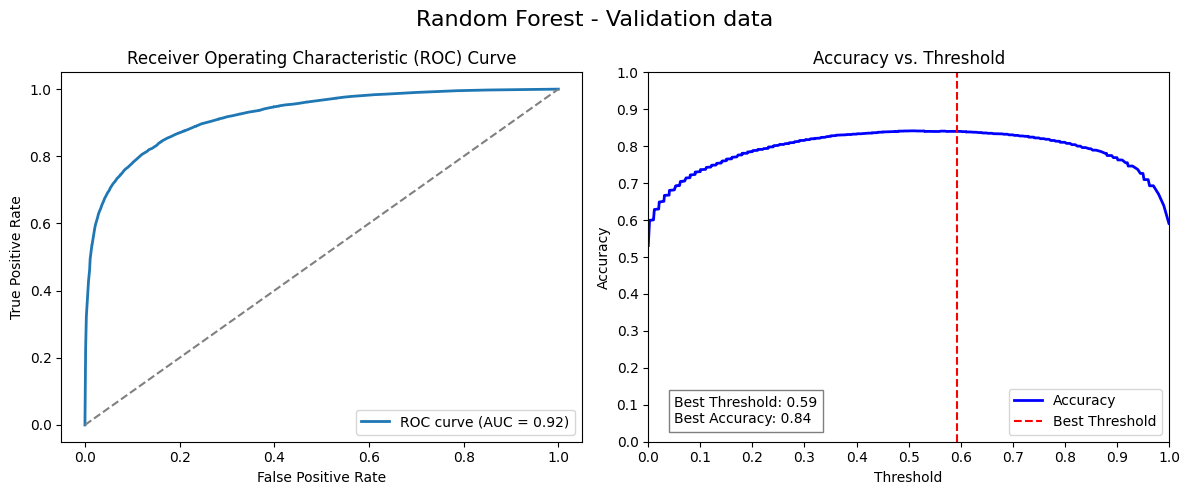

In [8]:
plot_roc_curve_and_accuracy(fpr, tpr, auc, thresholds, y_val, y_prob_val, "Random Forest - Validation data")

In [9]:
optimal_threshold, optimal_accuracy = optimize_threshold_for_accuracy(y_val, y_prob_val)
print(f"Optimal Threshold: {optimal_threshold:.3}, Accuracy: {optimal_accuracy:.3}")

Optimal Threshold: 0.505, Accuracy: 0.842


In [10]:
y_pred = predict_classification(model,X_test,y_test,optimal_threshold,True)

Evaluation metrics:
Accuracy    :	0.843
F1 score    :	0.853
Precision   :	0.863
NVP         :	0.845
Sensitivity :	0.842
Specificity :	0.845


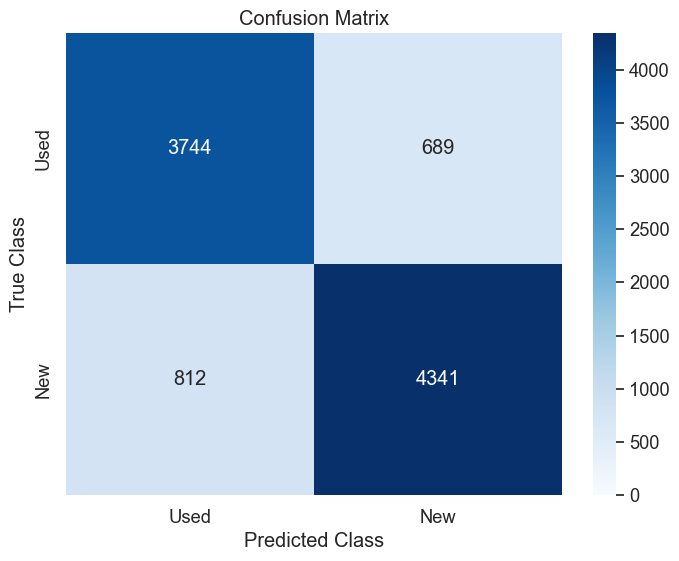

In [11]:
plot_confusion_matrix(y_test, y_pred,False,["Used","New"])

In [12]:
feature_names = X_train.columns.tolist()
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance',ascending=False)
feature_importance_df_sorted.set_index('Feature', inplace=True)
feature_importance_df_sorted

,Importance
Feature,
price,0.200611
listing_free,0.128401
initial_quantity,0.118089
available_quantity,0.088510
num_pictures,0.058471
sold_quantity,0.048380
start_week,0.046980
stop_week,0.046138
start_day,0.035586
